# Using OpenBB #

In this notebook we will learn the basics of using the OpenBB SDK. The following is taken from the OpenBB docs, which can be found [here](https://docs.openbb.co/sdk/guides/basics#how-to-use-the-sdk).

***
## Basics ##

Nearly everything required to interact with any function from the OpenBB Terminal gets imported in one line. 

### Imports

In [1]:
from openbb_terminal.sdk import openbb

### Navigation 

In the same way as operating the OpenBB Terminal, functions are divided into menus which are scrollable after importing into a jupyter notebook. Entering a period `.` after openbb, will display the Sub-menus available.

An alternate way to view the contents of a menu is to use Python's built-in help.

In [2]:
help(openbb.stocks.dd)

Help on Breadcrumb in module openbb_terminal.core.library.breadcrumb:

<openbb_terminal.core.library.breadcrumb.Breadcrumb object>
    DD Menu
    
    The SDK commands of the the menu:
            <openbb>.stocks.dd.customer
            <openbb>.stocks.dd.supplier
            <openbb>.stocks.dd.est
            <openbb>.stocks.dd.arktrades
            <openbb>.stocks.dd.rating
            <openbb>.stocks.dd.rot
            <openbb>.stocks.dd.rot_chart
            <openbb>.stocks.dd.analyst
            <openbb>.stocks.dd.news
            <openbb>.stocks.dd.sec
            <openbb>.stocks.dd.pt
            <openbb>.stocks.dd.pt_chart



### Docstrings

In addition to Python's built-in help, docstrings are also displayed in the Contextual Help window, within a Jupyter environment or by running help(openbb.economy.events) in your code editor.

In [3]:
help(openbb.economy.events)

Help on Operation in module openbb_terminal.core.library.operation:

<openbb_terminal.core.library.operation.Operation object>
    Get economic calendar for countries between specified dates
    
    Parameters
    ----------
    countries : [List[str],str]
        List of countries to include in calendar.  Empty returns all
    start_date : Optional[str]
        Start date for calendar
    end_date : Optional[str]
        End date for calendar
    
    Returns
    -------
    pd.DataFrame
        Economic calendar
    
    Examples
    --------
    Get todays economic calendar for the United States
    >>> from openbb_terminal.sdk import openbb
    >>> calendar = openbb.economy.events("united_states")
    
    To get multiple countries for a given date, pass the same start and end date as well as
    a list of countries
    >>> calendars = openbb.economy.events(["united_states", "canada"], start_date="2022-11-18", end_date="2022-11-18")



***
## How to use the SDK

### First Function 

To get started using the OpenBB SDK you can try the below code for your first function.

In [4]:
openbb.economy.events()

,Time (ET),Country,Event,Actual,Consensus,Previous,Date
0,24H,Japan,Economy Watchers Current Index,48.5,48.4,48.7,2023-02-08
1,00:30,India,Reverse REPO Rate,3.35%,-,3.35%,2023-02-08
2,02:45,France,French Non-Farm Payrolls,0.0%,0.2%,0.4%,2023-02-08
3,03:30,Germany,German Buba Balz Speaks,-,-,-,2023-02-08
4,04:00,Italy,Italian Retail Sales,-0.2%,-0.8%,0.8%,2023-02-08
5,04:00,Italy,Italian Retail Sales,3.4%,-,4.4%,2023-02-08
6,04:00,Euro Zone,ECB's Elderson Speaks,-,-,-,2023-02-08
7,06:30,India,M3 Money Supply,9.8%,-,9.7%,2023-02-08
8,07:00,United States,MBA 30-Year Mortgage Rate,6.18%,-,6.19%,2023-02-08
9,07:00,United States,MBA Mortgage Applications,7.4%,-,-9.0%,2023-02-08


_NOTE: THE RESULTS FROM DATA FUNCTIONS ARE NOT STORED TO MEMORY UNLESS EXPLICITLY INSTRUCTED TO. MOST FUNCTIONS RETURNING DATA ARE PRESENTED AS A PANDAS DATAFRAME._

Modify the syntax slightly to deliver the output into a DataFrame:

In [5]:
economic_calendar = openbb.economy.events()

Defined as a variable, interacting with the results becomes a matter of manipulating tables. For example, the code block below will filter the results of the events function to display only events scheduled at a specific time.

In [6]:
economic_calendar = openbb.economy.events()
economic_calendar.set_index(keys = ['Time (ET)'], append = True, inplace = True)
events = economic_calendar.filter(like = '9:00', axis = 0)

events

,,Country,Event,Actual,Consensus,Previous,Date
,Time (ET),,,,,,


### Passing Results to Another Function

Let's take a look at another example where the input to a function is a list. It may be desirable to derive that list from a different function. This can be useful for screening tickers, or analyzing particular industries or sectors. The Comparison Analysis sub-module, within Stocks, is one set of functions that can benefit from this kind of workflow. Instead of something like:

In [7]:
openbb.stocks.ca.screener(similar = ['AAPL', 'NFLX', 'META', 'AMZN', 
                                     'MSFT', 'GOOGL', 'DIS', 'TSLA'], 
                                     data_type = 'valuation')

,Ticker,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
0,AAPL,2.390740e+12,26.27,23.39,3.23,6.17,43.32,46.55,28.94,0.089,0.0924,0.216,0.0813,0.115,151.88,-0.0179,33620119.0
1,AMZN,1.137610e+12,NaN,40.06,NaN,2.21,7.15,16.25,NaN,-1.082,1.7707,-0.260,0.4600,0.236,100.52,-0.0156,41392998.0
2,DIS,2.085300e+11,63.86,21.10,3.00,2.52,2.14,17.95,195.44,0.578,0.2834,-0.210,0.2126,0.085,112.01,0.0034,7236852.0
3,GOOGL,1.439170e+12,21.79,17.62,1.40,5.10,5.42,12.65,23.98,-0.188,0.1916,0.233,0.1551,0.206,99.61,-0.0746,64505297.0
4,META,5.085000e+11,22.93,16.95,6.31,4.36,4.02,12.48,26.70,-0.417,0.2172,0.054,0.0363,0.235,186.14,-0.0286,22807621.0
5,MSFT,2.039850e+12,29.75,25.00,2.53,9.99,10.89,20.50,50.18,0.198,0.1462,0.243,0.1177,0.155,270.16,0.0097,35111820.0
6,NFLX,1.620800e+11,39.72,25.06,2.49,5.13,7.78,26.75,100.13,-0.144,0.2668,0.449,0.1597,0.220,363.99,0.0029,2621892.0
7,TSLA,6.171200e+11,54.29,35.77,2.15,7.58,13.91,27.82,41.93,1.217,0.3894,0.399,0.2531,0.473,200.19,0.0172,116816220.0


Try, `openbb.etf.holdings`, to populate a list dynamically:

In [8]:
symbols = openbb.etf.holdings('DIA')
dia_symbols = list(symbols.index.drop(['N/A']))
dia_valuation = openbb.stocks.ca.screener(similar = dia_symbols, 
                                          data_type = 'valuation')
dia_valuation = dia_valuation.sort_values(by = ['Price'], 
                                          ascending = False).convert_dtypes()

dia_valuation.head(5)

,Ticker,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
25,UNH,444450000000.0,22.51,16.86,1.62,1.37,5.97,11.44,30.01,0.128,0.1343,0.201,0.1394,0.092,481.41,0.0095,1289424
10,GS,126620000000.0,12.45,9.27,<NA>,1.84,1.22,0.45,<NA>,1.403,0.1834,0.296,-0.0169,0.113,377.07,0.0071,1036551
11,HD,339730000000.0,19.6,19.29,3.96,2.16,256.06,137.99,131.47,0.301,0.0118,0.192,0.0495,0.098,321.74,-0.0106,1137635
21,MSFT,2039850000000.0,29.75,25.0,2.53,9.99,10.89,20.5,50.18,0.198,0.1462,0.243,0.1177,0.155,270.16,0.0097,35111820
18,MCD,195050000000.0,32.04,22.91,4.39,8.41,<NA>,68.96,98.87,0.591,0.1028,0.13,0.073,-0.012,264.07,-0.0122,1184821


### Displaying Charts

The OpenBB SDK has built-in charting libraries for Matplotlib, for any chart available from the Terminal. User style sheets can be added to the folder (more on this in Importing and Exporting Data), `~/OpenBBUserData/styles/user`. Styles are shared properties between the OpenBB Terminal and the SDK.

_NOTE: DISPLAYING CHARTS IN JUPYTER NOTEBOOKS REQUIRES AN ADDITIONAL LINE OF CODE. YOU CAN EITHER RENDER A STATIC IMAGE WITH `%matplotlib inline` OR ADD IN PAN/ZOOM FUNCTIONALITY WITH `%matplotlib widget`._

Functions, such as `candle`, exist to display charts. Others, like those within the Technical Analysis module, have the option to return either, a chart or raw data. The next examples will outline a few different scenarios. First, let's get some data:

In [9]:
spy_daily = openbb.stocks.load(
        symbol = 'SPY',
        start_date = '1993-11-01',
        monthly = True)

Loading Monthly data for SPY with starting period 1993-11-01.

Data from the previous example, `spy_daily`, can be used in the `openbb.stocks.candle` function, for example:

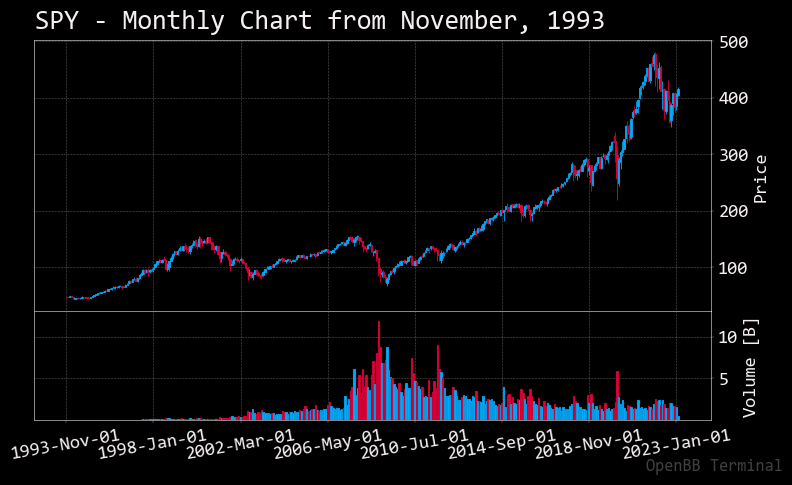

In [10]:
openbb.stocks.candle(
    data = spy_daily,
    asset_type = 'SPY - Monthly Chart from November, 1993',
    symbol = ''
)

The function will also respond to individual tickers without saving the data first as done with `load`:

Loading Daily data for SPY with starting period 2020-02-04.

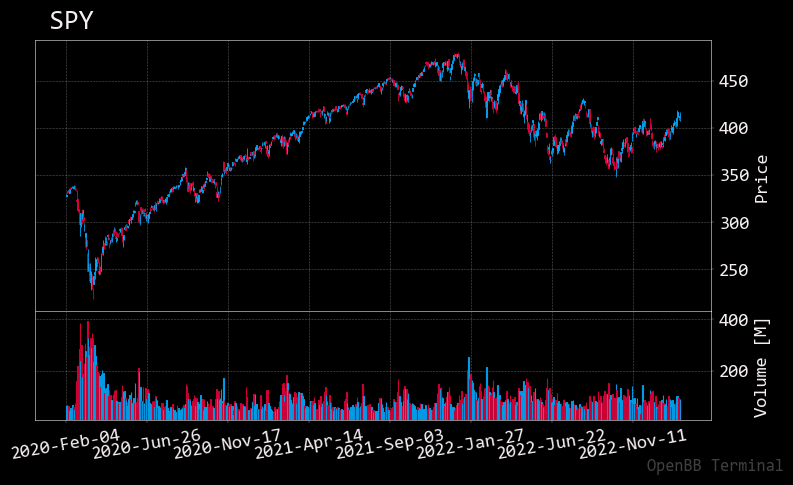

In [11]:
openbb.stocks.candle('SPY')

Where functions in the Terminal display either a chart or raw data, the command will have an additional `_chart` component. For example, Donchian Channels:

In [12]:
openbb.ta.donchian(openbb.stocks.load('SPY', interval = 15))

Loading Intraday 15min data for SPY with starting period 2022-12-11.

,DCL_20_20,DCM_20_20,DCU_20_20
date,,,
2022-12-12 14:15:00,393.411987,394.830994,396.250000
2022-12-12 14:30:00,393.619995,394.934998,396.250000
2022-12-12 14:45:00,393.809998,395.345001,396.880005
2022-12-12 15:00:00,393.809998,395.750000,397.690002
2022-12-12 15:15:00,394.000000,396.123001,398.246002
...,...,...,...
2023-02-08 12:15:00,408.872406,412.681198,416.489990
2023-02-08 12:30:00,410.149994,413.319992,416.489990
2023-02-08 12:45:00,410.149994,413.319992,416.489990


Loading Intraday 15min data for SPY with starting period 2022-12-11.

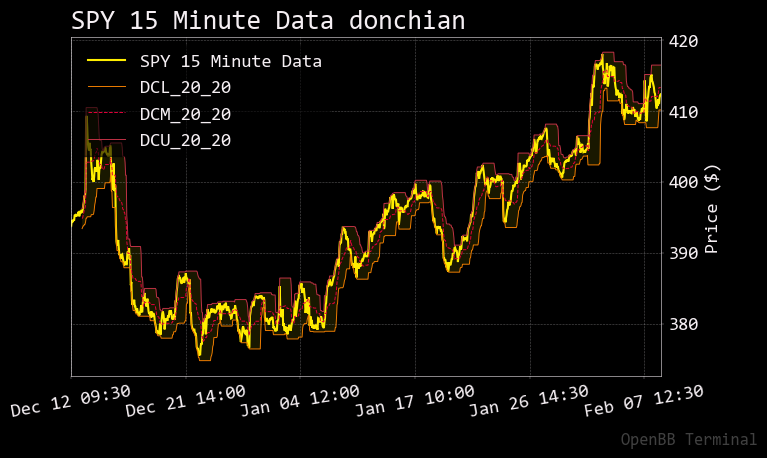

In [13]:
openbb.ta.donchian_chart(
    data = openbb.stocks.load('SPY', interval = 15),
    symbol = 'SPY 15 Minute Data'
)

Futures curves are another example where this syntax is applied:

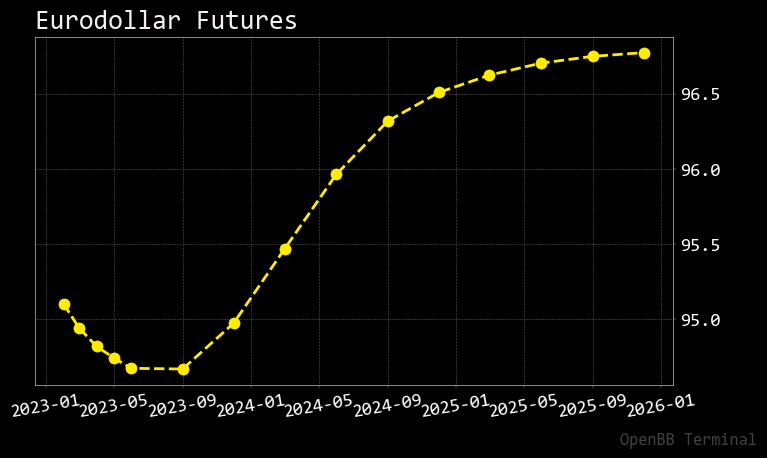

In [14]:
openbb.futures.curve_chart('GE')